In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Cleaned_Superstore.csv")
df.shape

(2120, 19)

In [12]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer Name',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Duration', 'Month'],
      dtype='object')

In [5]:
# Convert 'Order Date' to datetime and extract Month-Year
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)

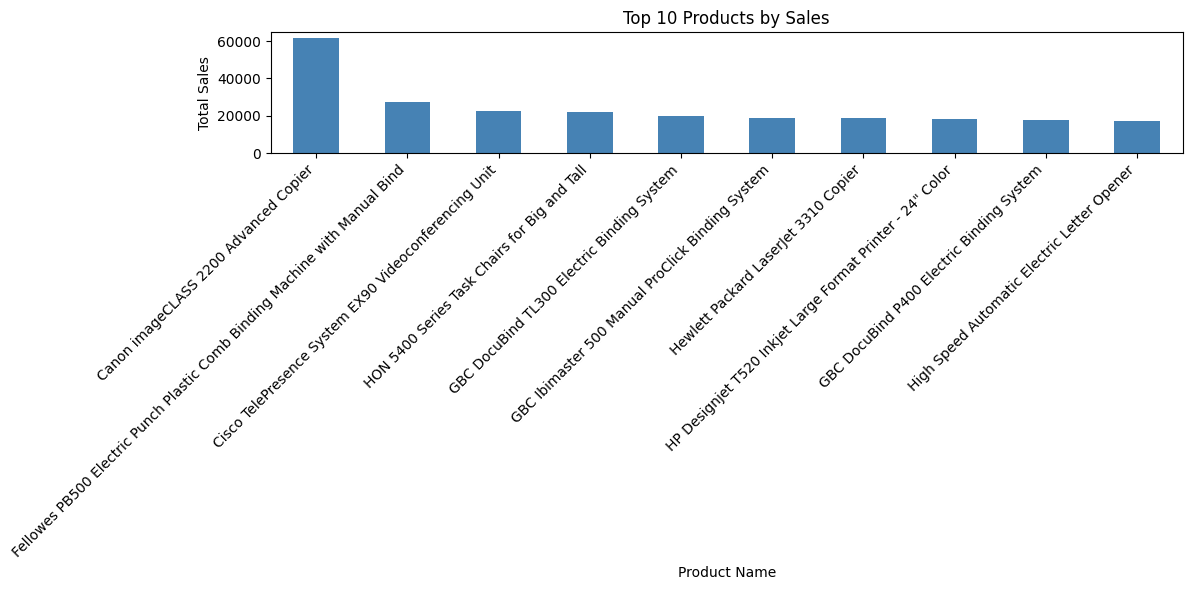

In [6]:
# 1. Bar Chart: Top 10 Products by Sales

top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='steelblue')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

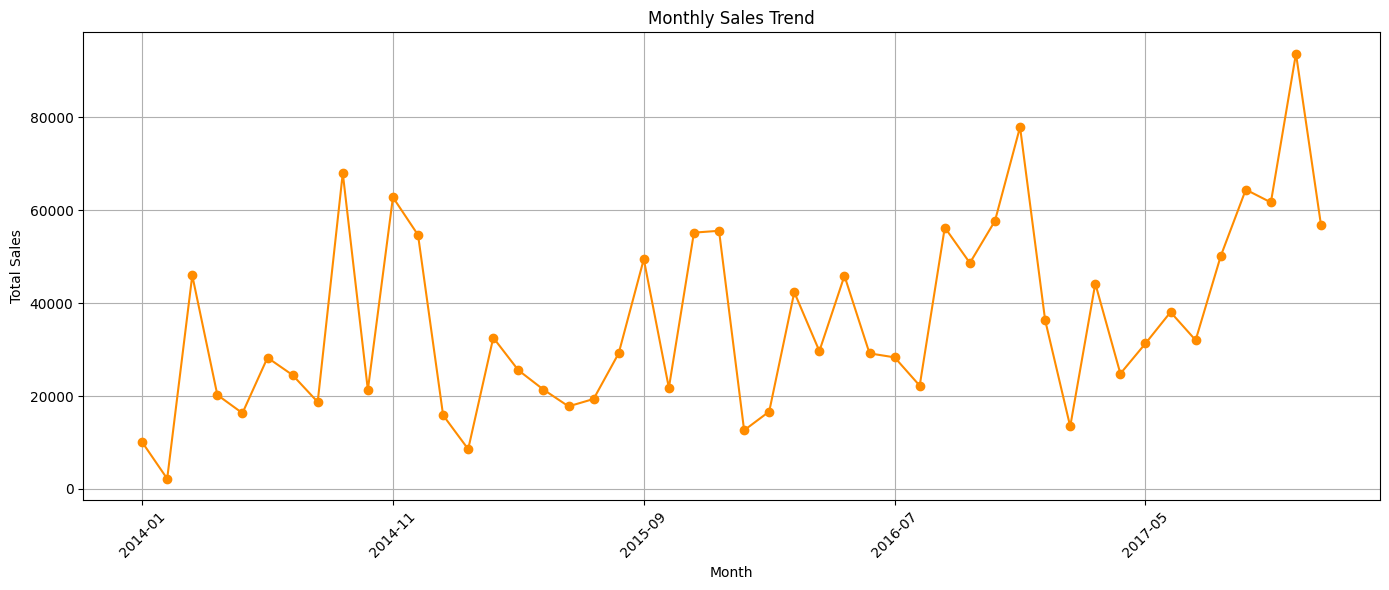

In [7]:
# 2. Line Chart: Monthly Sales Trend

monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(14, 6))
monthly_sales.plot(marker='o', linestyle='-', color='darkorange')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

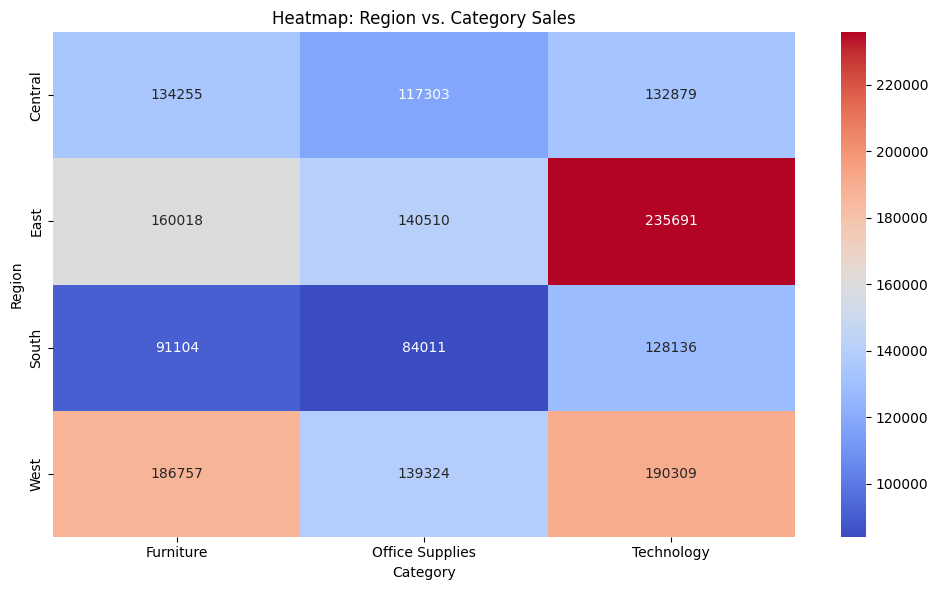

In [8]:
# 3. Heatmap: Regional Sales by Category

region_category = df.pivot_table(index='Region', columns='Category', values='Sales', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(region_category, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Heatmap: Region vs. Category Sales')
plt.ylabel('Region')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

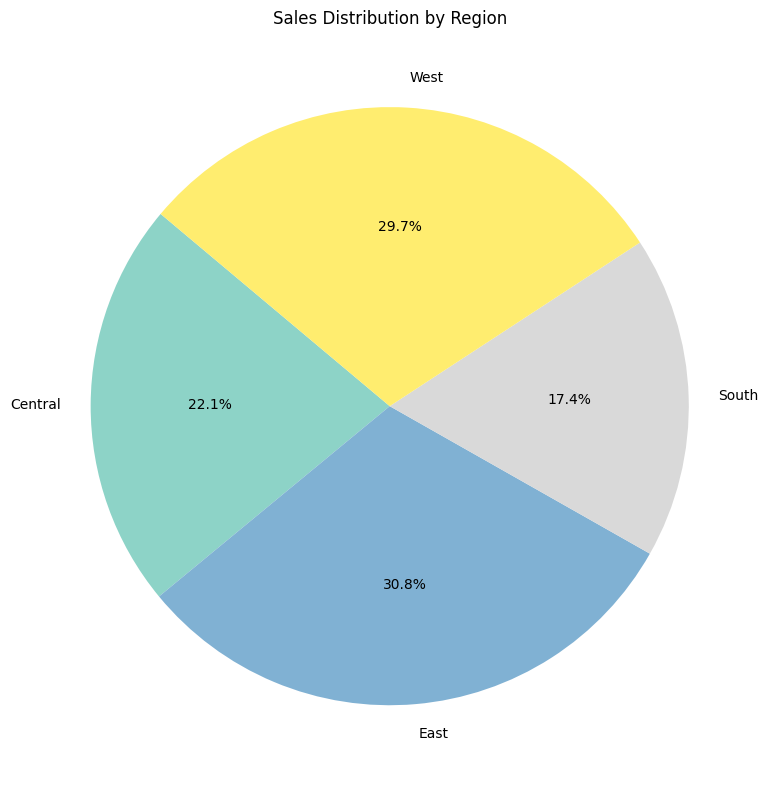

In [9]:
# 4. Pie Chart: Sales by Region

region_sales = df.groupby('Region')['Sales'].sum()

plt.figure(figsize=(8, 8))
region_sales.plot.pie(autopct='%1.1f%%', startangle=140, colormap='Set3')
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.tight_layout()
plt.show()


<ipython-input-10-278d5040b4f8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='Profit', palette='pastel')


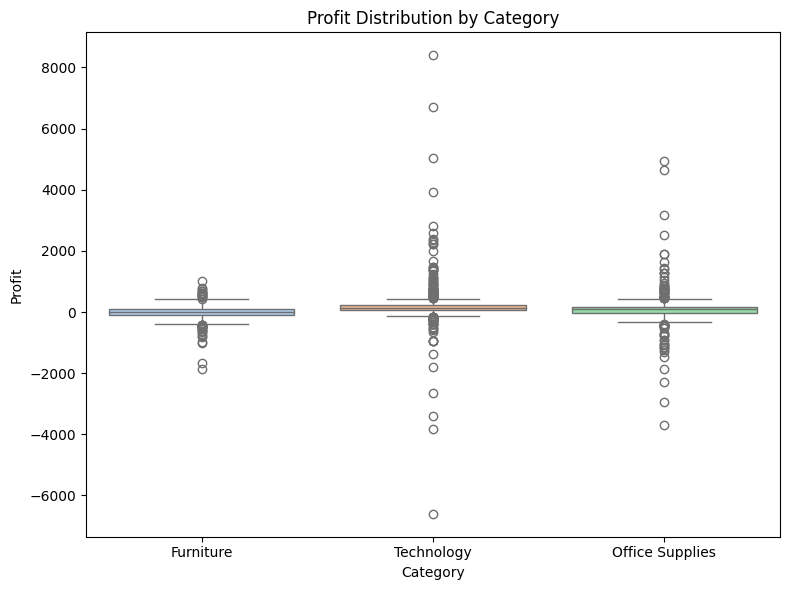

In [10]:
# 5. Boxplot: Profit Distribution by Category

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Category', y='Profit', palette='pastel')
plt.title('Profit Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()
